<a href="https://colab.research.google.com/github/Sukhjeet1-Naruto/HAR-activity/blob/master/HAR%20activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd '/content/drive/MyDrive/AnalyticsProject'

/content/drive/MyDrive/AnalyticsProject


In [15]:
import numpy as np
import pandas as pd
from numpy import dstack
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [16]:
#train dataset 
X_train = pd.read_csv('HARdataset/train/X_train.txt',delim_whitespace=True,header=None).to_numpy()

In [17]:
#train dataset labels
y_train = pd.read_csv('HARdataset/train/y_train.txt',delim_whitespace=True,header=None).to_numpy().reshape(-1)

In [18]:
#test dataset
X_test = pd.read_csv('HARdataset/test/X_test.txt',delim_whitespace=True,header=None).to_numpy()

In [19]:
#test labels
y_test = pd.read_csv('HARdataset/test/y_test.txt',delim_whitespace=True,header=None).to_numpy().reshape(-1)

In [20]:
#Clustering
#Model 1
model_1 =  KNeighborsClassifier(n_neighbors=3)
model_1.fit(X_train,y_train)
prediction_1 = model_1.predict(X_test)
print(prediction_1)
accuracy_1 = accuracy_score(y_test, prediction_1)
print("Accuracy of KNN:", accuracy_1 * 100.0)

[5 5 5 ... 2 2 1]
Accuracy of KNN: 89.07363420427554


In [21]:
#Classification ..
#Model_2
model_2 = GaussianNB()
model_2.fit(X_train,y_train)
prediction_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, prediction_2)
print(prediction_2)
print("Accuracy of Naive Bias:", accuracy_2 * 100.0)

[5 5 5 ... 2 2 2]
Accuracy of Naive Bias: 77.02748557855446


In [22]:
len(y_test)

2947

##TESTING




In [24]:
activity_label = pd.read_csv('HARdataset/activity_labels.txt',delim_whitespace=True,header=None).to_numpy()
activity_label[:,1]
action = activity_label[:,1]
action
# action = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

In [25]:
i = 2946
input = X_test[i].reshape(1, -1)
pred_1 =  model_1.predict(input)
pred_2 = model_2.predict(input)

print("KNN prediction:", action[int(pred_1)])
print("Naive Bias Prediction:", action[int(pred_2)])
print("Real label:",action[y_test[i]])

KNN prediction: WALKING_UPSTAIRS
Naive Bias Prediction: WALKING_DOWNSTAIRS
Real label: WALKING_DOWNSTAIRS


Confusion Matrix : The performance of a classification model

[[481   4  11   0   0   0]
 [ 36 422  13   0   0   0]
 [ 49  42 329   0   0   0]
 [  0   3   0 383 105   0]
 [  0   0   0  57 475   0]
 [  0   0   0   1   1 535]]


Text(389.93375000000003, 0.5, 'predicted label')

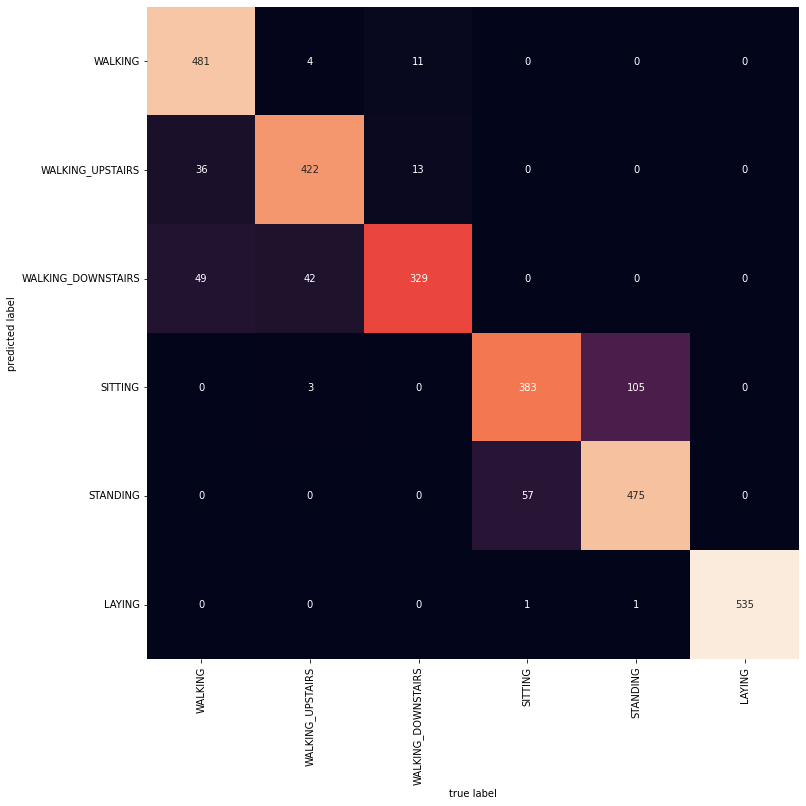

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
import seaborn as sns
prediction_1 = model_1.predict(X_test)
mat = confusion_matrix(y_test, prediction_1)
print(mat)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=action, yticklabels=action)

plt.xlabel('true label')
plt.ylabel('predicted label')

Text(387.43375000000003, 0.5, 'Predicted labels')

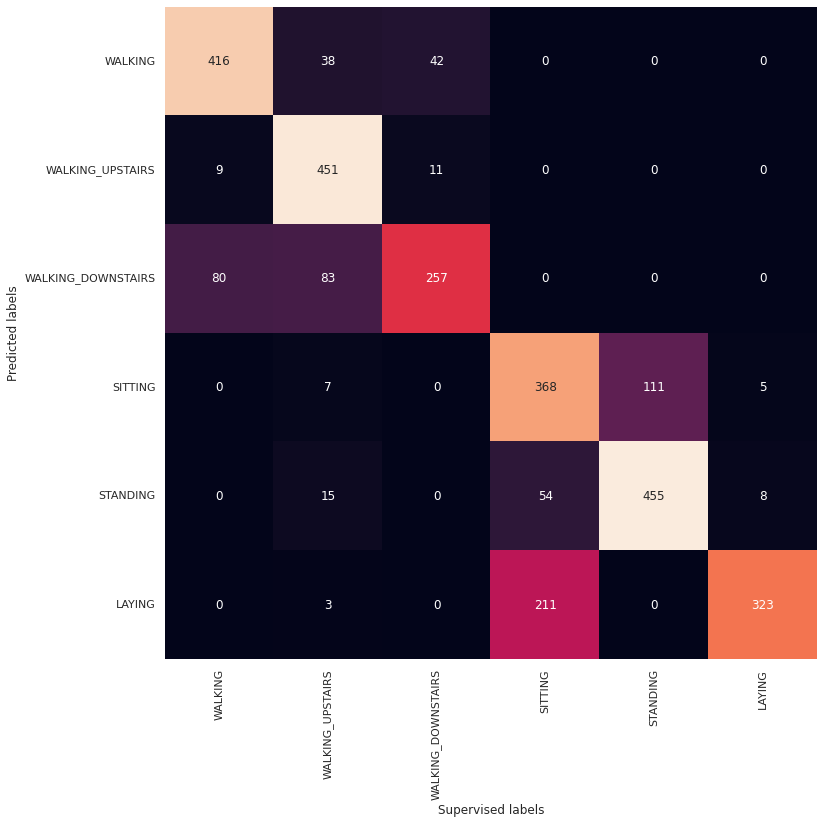

In [27]:
sns.set()
prediction_2 = model_2.predict(X_test)
plt.figure(figsize=(20,12))
# The performance of a classification model

mat_2 = confusion_matrix(y_test, prediction_2)

sns.heatmap(mat_2, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=action, yticklabels=action)
plt.xlabel('Supervised labels')
plt.ylabel('Predicted labels')

Correlation matrix graph for the train data


In [28]:
#Clustering
#Model 3
model_3 =  RandomForestClassifier(n_estimators=100)
model_3.fit(X_train,y_train)
prediction_3 = model_3.predict(X_test)
print(prediction_3)
accuracy_3 = accuracy_score(y_test, prediction_3)
print("Accuracy of Random Forest:", accuracy_3 * 100.0)

[5 5 5 ... 2 2 2]
Accuracy of Random Forest: 92.39904988123516


Text(387.43375000000003, 0.5, 'Predicted labels')

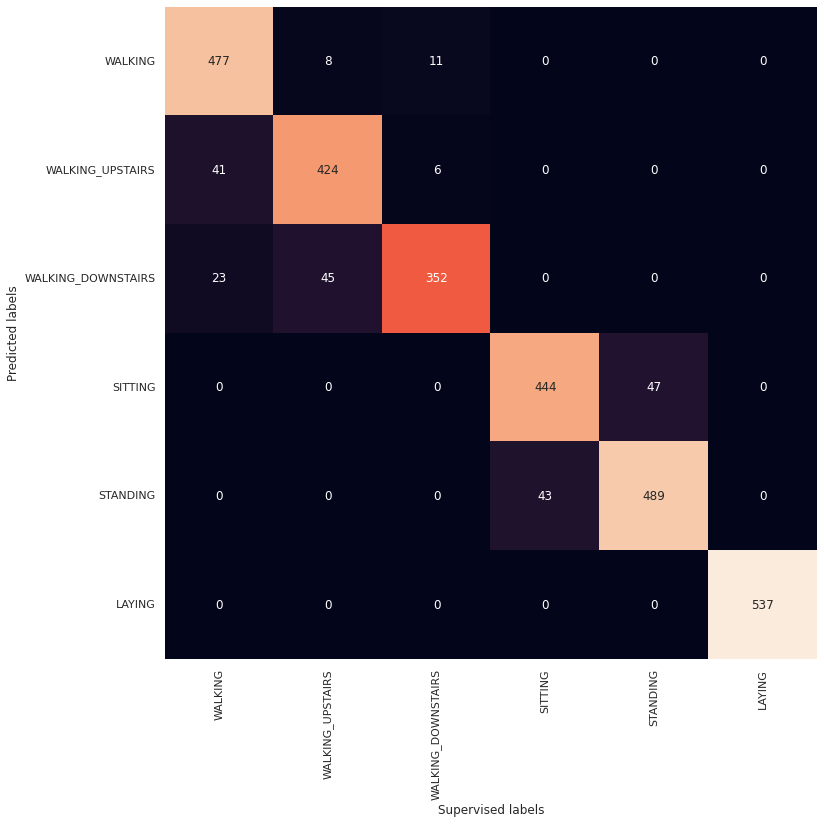

In [29]:
sns.set()
prediction_3 = model_3.predict(X_test)
plt.figure(figsize=(20,12))
# The performance of a classification model

mat_3 = confusion_matrix(y_test, prediction_3)

sns.heatmap(mat_3, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=action, yticklabels=action)
plt.xlabel('Supervised labels')
plt.ylabel('Predicted labels')




